In [1]:
#pip install wordcloud

In [2]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stopwords_wc

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
# Read the csv files containin gthe tweets by Eon Musk from 2010 to 2022.
df_2010 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2010.csv')
df_2011 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2011.csv')
df_2012 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2012.csv')
df_2013 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2013.csv')
df_2014 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2014.csv')
df_2015 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2015.csv')
df_2016 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2016.csv')
df_2017 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2017.csv')
df_2018 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2018.csv')
df_2019 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2019.csv')
df_2020 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2020.csv')
df_2021 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2021.csv')
df_2022 = pd.read_csv('../Data_Resources/elon_musk_kaggle/2022.csv')

In [5]:
print(f"shape of 2010 df: " + str(df_2010.shape))
print(f"shape of 2011 df: " + str(df_2012.shape))
print(f"shape of 2012 df: " + str(df_2012.shape))
print(f"shape of 2013 df: " + str(df_2013.shape))
print(f"shape of 2014 df: " + str(df_2014.shape))
print(f"shape of 2015 df: " + str(df_2015.shape))
print(f"shape of 2016 df: " + str(df_2016.shape))
print(f"shape of 2017 df: " + str(df_2017.shape))
print(f"shape of 2018 df: " + str(df_2018.shape))
print(f"shape of 2019 df: " + str(df_2019.shape))
print(f"shape of 2020 df: " + str(df_2020.shape))
print(f"shape of 2021 df: " + str(df_2021.shape))
print(f"shape of 2022 df: " + str(df_2022.shape))

shape of 2010 df: (1, 39)
shape of 2011 df: (313, 39)
shape of 2012 df: (313, 39)
shape of 2013 df: (737, 39)
shape of 2014 df: (923, 39)
shape of 2015 df: (1253, 39)
shape of 2016 df: (2000, 39)
shape of 2017 df: (3167, 39)
shape of 2018 df: (2285, 39)
shape of 2019 df: (8312, 39)
shape of 2020 df: (11717, 39)
shape of 2021 df: (3115, 36)
shape of 2022 df: (1028, 36)


### From the above o/p I see that all the dataframes have the same number of columns (39) except for 2021 and 2022 (36). 

In [6]:
# Rename and make all columns with same names

df_2010 = df_2010[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2011 = df_2011[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2012 = df_2012[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2013 = df_2013[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2014 = df_2014[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2015 = df_2015[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2016 = df_2016[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2017 = df_2017[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2018 = df_2018[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2019 = df_2019[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2020 = df_2020[['id','date','tweet','nreplies','nlikes','nretweets']]
df_2021 = df_2021[['id','date','tweet','replies_count','likes_count','retweets_count']]
df_2022 = df_2022[['id','date','tweet','replies_count','likes_count','retweets_count']]

df_2021.rename(columns = {'replies_count':'nreplies', 'likes_count':'nlikes','retweets_count':'nretweets'}, inplace = True)
df_2022.rename(columns = {'replies_count':'nreplies', 'likes_count':'nlikes','retweets_count':'nretweets'}, inplace = True)

In [7]:
df_2010.columns

Index(['id', 'date', 'tweet', 'nreplies', 'nlikes', 'nretweets'], dtype='object')

In [8]:
df_2022.columns

Index(['id', 'date', 'tweet', 'nreplies', 'nlikes', 'nretweets'], dtype='object')

In [9]:
df_tweets = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis = 0)

In [10]:
df_tweets.shape

(34878, 6)

In [11]:
df_tweets.head()

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391,4652,348
0,152153637639028736,2011-12-28 22:27:08,@TheOnion So true :),7,12,1
1,151809315026636800,2011-12-27 23:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13,39,34
2,151338939389706242,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9,155,18
3,151337237429239808,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15,158,13


In [12]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         34878 non-null  int64 
 1   date       34878 non-null  object
 2   tweet      34878 non-null  object
 3   nreplies   34878 non-null  int64 
 4   nlikes     34878 non-null  int64 
 5   nretweets  34878 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.9+ MB


In [13]:
df_elon_tweets = pd.read_csv('../../Tamara/elon_tweets_2.csv')
df_elon_tweets.columns

Index(['Unnamed: 0', 'Tweet_ID', 'Date', 'Tweet_Text', 'likes_count',
       'retweet_counts'],
      dtype='object')

In [14]:
df_elon_tweets = df_elon_tweets.loc[df_elon_tweets['Date']>='2022-03-05']

In [15]:
df_elon_tweets['Date'] = pd.to_datetime(df_elon_tweets['Date']).dt.date

In [16]:
df_elon_tweets=df_elon_tweets.drop(df_elon_tweets.columns[0], axis=1)

In [17]:
df_elon_tweets.rename(columns = {'Tweet_ID':'id','Date':'date','Tweet_Text':'tweet','likes_count':'nlikes','retweet_counts':'nretweets'}, inplace = True)
df_elon_tweets

,id,date,tweet,nlikes,nretweets
0,1546733355336716289,2022-07-12,@cb_doge But Fifth Element was great,2572,126
1,1546727913944502274,2022-07-12,@Erdayastronaut @PPathole @planet4589 @NASASpaceflight Base of the vehicle seems ok by flashligh...,8611,441
2,1546726583393828870,2022-07-12,"@SpaceTelescope Cool, congrats! \n\nNow the simulators will have to spend more money on rendering.",22373,954
3,1546722385486815233,2022-07-12,@ChrisDungeon @alexkehr @BillyM2k @levie Rereading The Life of Greece by Durant. In recent month...,3072,264
4,1546720437828190208,2022-07-12,@dogeofficialceo 🤣,47225,931
...,...,...,...,...,...
1620,1499947614497906696,2022-03-05,@GailAlfarATX Exactly,5109,173
1621,1499918115018313728,2022-03-05,"And also my sympathies to the great people of Russia, who do not want this",334550,18242
1622,1499917894767063043,2022-03-05,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦,555321,54425
1623,1499909806504779779,2022-03-05,"Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...",207920,21247


In [18]:
df_tweets

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391,4652,348
0,152153637639028736,2011-12-28 22:27:08,@TheOnion So true :),7,12,1
1,151809315026636800,2011-12-27 23:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13,39,34
2,151338939389706242,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9,155,18
3,151337237429239808,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15,158,13
...,...,...,...,...,...,...
1023,1477775713172402176,2022-01-03,https://t.co/LA9hPzVlGx,25611,473530,51383
1024,1477706142461706248,2022-01-02,Let’s make the roaring 20’s happen!,22500,320201,26951
1025,1477700424933253123,2022-01-02,Great work by Tesla team worldwide!,5630,66405,4459
1026,1477096955658579974,2022-01-01,@BLKMDL3 @Tesla 🔥,1074,45704,472


In [19]:
df_tweets_new = pd.concat([df_tweets,df_elon_tweets],axis=0)

df_tweets_new.shape

(36503, 6)

In [20]:
#Convert the date column from string to "datetime" column. extracting just the date.
df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date']).dt.date
df_tweets_new.head()

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
0,152153637639028736,2011-12-28,@TheOnion So true :),7.0,12,1
1,151809315026636800,2011-12-27,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,13.0,39,34
2,151338939389706242,2011-12-26,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,9.0,155,18
3,151337237429239808,2011-12-26,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",15.0,158,13


In [21]:
df_tweets_new.shape

(36503, 6)

In [22]:
# Let us sort the dates in ascending order.
df_tweets_new.sort_values(by=['date'], inplace=True, ascending=True)
df_tweets_new.reset_index(drop=True, inplace=True)
df_tweets_new.head(20)

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
1,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
2,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
3,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
4,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
5,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
6,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
7,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
8,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
9,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348


#### After sorting the records in ascending order, we see a lot of duplicate records. These duplicate records need to be removed.

In [23]:
#Checking for duplicate records
df_tweets_new[df_tweets_new.duplicated(keep='first')][:10]

,id,date,tweet,nreplies,nlikes,nretweets
1,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
2,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
3,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
4,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
5,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
6,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
7,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
8,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
9,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
11,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,31.0,78,9


In [24]:
#Drop duplicate records from the dataframe and reset the index
df_tweets_final = df_tweets_new.drop_duplicates(keep='first')
df_tweets_final.reset_index(drop=True, inplace=True)
df_tweets_final.head(15)

,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
1,142188458125963264,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,31.0,78,9
2,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",32.0,189,15
3,142880871391838208,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",7.0,29,25
4,142881284019060736,2011-12-03,That was a total non sequitur btw,31.0,53,6
5,143171132814671872,2011-12-04,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,17.0,65,9
6,149441101684686848,2011-12-21,His singing and acting talent will be sorely missed: http://t.co/IIFKob75 South Park sequel co...,6.0,32,2
7,149439686702661632,2011-12-21,Why does the crowd cry over the glorious leader Kim Il Sung's death? Fear of being shot may pla...,20.0,23,9
8,149444078210256896,2011-12-21,"Got called randomly by Kanye West today and received a download of his thoughts, ranging from sh...",19.0,1068,546
9,149447517325635584,2011-12-21,"Yeah, this really is me, as my Mom @mayemusk will attest. Not sure I can handle just doing 140 c...",11.0,34,4


In [25]:
print(df_tweets_final.shape)

(19504, 6)


#### After dropping the duplicate records we see that only half of the records remain. Let us no clean the tweets, ie remove all the #,@ symbols. 

In [26]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in df_tweets_final.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
df_tweets_final['tweet'] = new
df_tweets_final

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2675060673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_final['tweet'] = new


,id,date,tweet,nreplies,nlikes,nretweets
0,15434727182,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",391.0,4652,348
1,142188458125963264,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,31.0,78,9
2,142179928203460608,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys....",32.0,189,15
3,142880871391838208,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",7.0,29,25
4,142881284019060736,2011-12-03,That was a total non sequitur btw,31.0,53,6
...,...,...,...,...,...,...
19499,1546669610509799424,2022-07-12,"I don’t hate the man, but it’s time for Trump to hang up his hat &amp; sail into the sunset. Dem...",NaN,27326,2501
19500,1546666417759653888,2022-07-12,Tesla’s automatic cabin overheat protection should make a real difference with record heatwaves....,NaN,56429,4023
19501,1546663293909180418,2022-07-12,Not true,NaN,191417,8026
19502,1546715612495417344,2022-07-12,YouTube keeps playing me the same annoying scam ads every time I use it. The algorithm is convin...,NaN,7815,547


In [27]:
pd.DatetimeIndex(df_tweets_final["date"]).year

Int64Index([2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='date', length=19504)

### Visualize the number of tweets from 2010 to 2022 of Elon Musk

In [28]:
# Get the number of tweets every year by Elon Musk
date_count_df = df_tweets_final.groupby(pd.DatetimeIndex(df_tweets_final["date"]).year)["tweet"].count()
date_count_df = date_count_df.to_frame()
date_count_df

,tweet
date,
2010,1
2011,42
2012,272
2013,422
2014,188
2015,328
2016,754
2017,1170
2018,4579


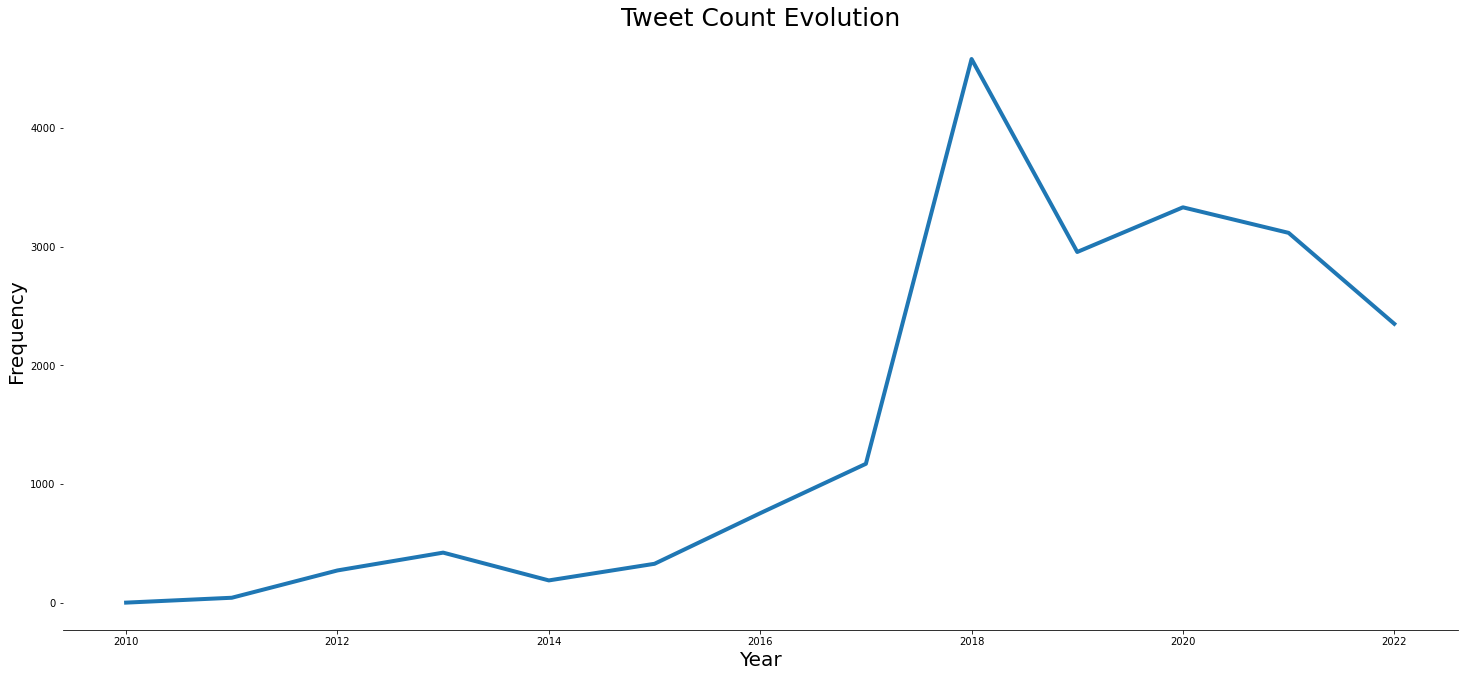

In [29]:
# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x= "date", y= "tweet", lw=4)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True)

### The number of tweets by Elon Musk kept increasing every year from 2010. Maximum number of tweets were generated in year 2018.

In [30]:
#Filter the dogecoin tweets from the df_tweets_new dataset
def filterTweetData(financialType=''):
    df = pd.DataFrame(columns = ['Date', 'Tweet'])

    for i in range(len(df_tweets_final)):
        cur = df_tweets_final.loc[i].tweet
        cur = cur.lower()
        if financialType in cur:
            df = df.append({'id' :df_tweets_final.loc[i].id,
                            'Date' : df_tweets_final.loc[i].date, 
                            'Tweet' : df_tweets_final.loc[i].tweet, 
                            'nlikes':df_tweets_final.loc[i].nlikes,
                            'nreplies':df_tweets_final.loc[i].nreplies,
                            'nretweets':df_tweets_final.loc[i].nretweets
                                     },
                    ignore_index = True)

    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df
    return df

### Filter the tweets containing the word "doge"

In [31]:
df_doge = filterTweetData('doge')

In [32]:
df_doge

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2019-04-02,Dogecoin value may vary,1.113179e+18,20160.0,1080.0,1959.0
1,2019-04-02,Dogecoin rulz,1.113173e+18,138893.0,1732.0,16539.0
2,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,1.113009e+18,9063.0,558.0,2428.0
3,2020-04-25,Dogecoin Mode,1.254040e+18,2192.0,124.0,207.0
4,2020-07-18,"Excuse me, I only sell Doge!",1.284290e+18,15930.0,416.0,775.0
...,...,...,...,...,...,...
71,2022-05-27,"Tesla merch can be bought with Doge, soon SpaceX merch too",1.530209e+18,203719.0,NaN,19599.0
72,2022-05-31,And Palmer always forgets to mention that he never wrote a single line of Dogecoin code …,1.531696e+18,3663.0,NaN,317.0
73,2022-05-31,You’re humble bro. Billy’s sense of humor &amp; irreverence is a big part of why people love Dog...,1.531699e+18,12204.0,NaN,1237.0
74,2022-06-19,I will keep supporting Dogecoin,1.538406e+18,396566.0,NaN,37467.0


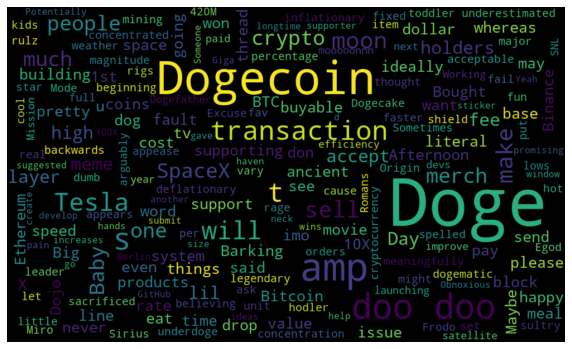

In [33]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_doge["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [34]:
# Get the number of tweets every year by Elon Musk
date_doge_df = df_doge.groupby(pd.DatetimeIndex(df_doge["Date"]).year)["Tweet"].count()
date_doge_df = date_doge_df.to_frame()
date_doge_df

,Tweet
Date,
2019,3
2020,4
2021,58
2022,11


Text(0, 0.5, 'Frequency')

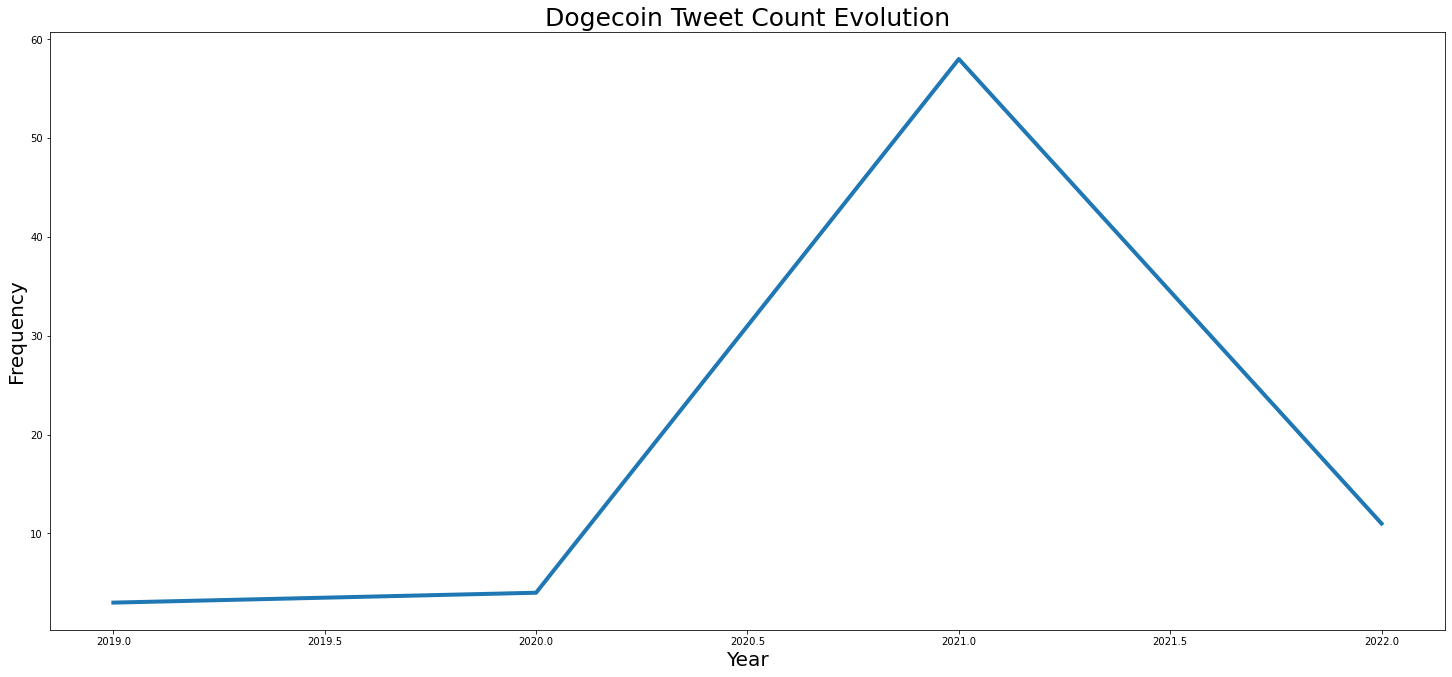

In [35]:
# Plot the number of tweets for dogecoing by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_doge_df, x= "Date", y= "Tweet", lw=4)
plt.title("Dogecoin Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
# sns.despine(left=True)

### Filter the tweets containing the word "tesla"

In [36]:
df_tesla = filterTweetData('tesla')

In [37]:
df_tesla

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2011-12-31,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrong,1.530997e+17,405.0,55.0,32.0
1,2012-01-11,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around...",1.569275e+17,315.0,32.0,67.0
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile mark for the first time and still has over 200 mil...",1.577007e+17,15.0,5.0,51.0
3,2012-01-17,Will communicate better in the future. Too many people want us to fail and are willing to twist ...,1.593310e+17,163.0,44.0,43.0
4,2012-01-17,That's not just paranoia (a healthy trait at times). Tesla really is under massive attack by sho...,1.593965e+17,16.0,23.0,14.0
...,...,...,...,...,...,...
1562,2022-06-18,"Tesla and SpaceX merch, maybe more down the road",1.538104e+18,18823.0,NaN,1206.0
1563,2022-07-06,Zip around Vegas super fast with Teslas in tunnels!,1.544513e+18,13671.0,NaN,752.0
1564,2022-07-07,Super fired up for future product development with our awesome Tesla team! Such an honor to work...,1.545166e+18,137575.0,NaN,8685.0
1565,2022-07-07,Maybe Tesla should make a highly configurable Robovan for people &amp; cargo?,1.545052e+18,120221.0,NaN,6731.0


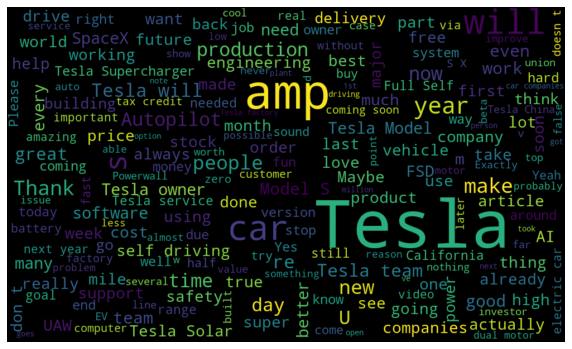

In [38]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_tesla["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [39]:
# Get the number of tweets every year by Elon Musk
date_tesla_df = df_tesla.groupby(pd.DatetimeIndex(df_tesla["Date"]).year)["Tweet"].count()
date_tesla_df = date_tesla_df.to_frame()
date_tesla_df

,Tweet
Date,
2011,1
2012,30
2013,69
2014,29
2015,25
2016,80
2017,71
2018,505
2019,246


Text(0, 0.5, 'Frequency')

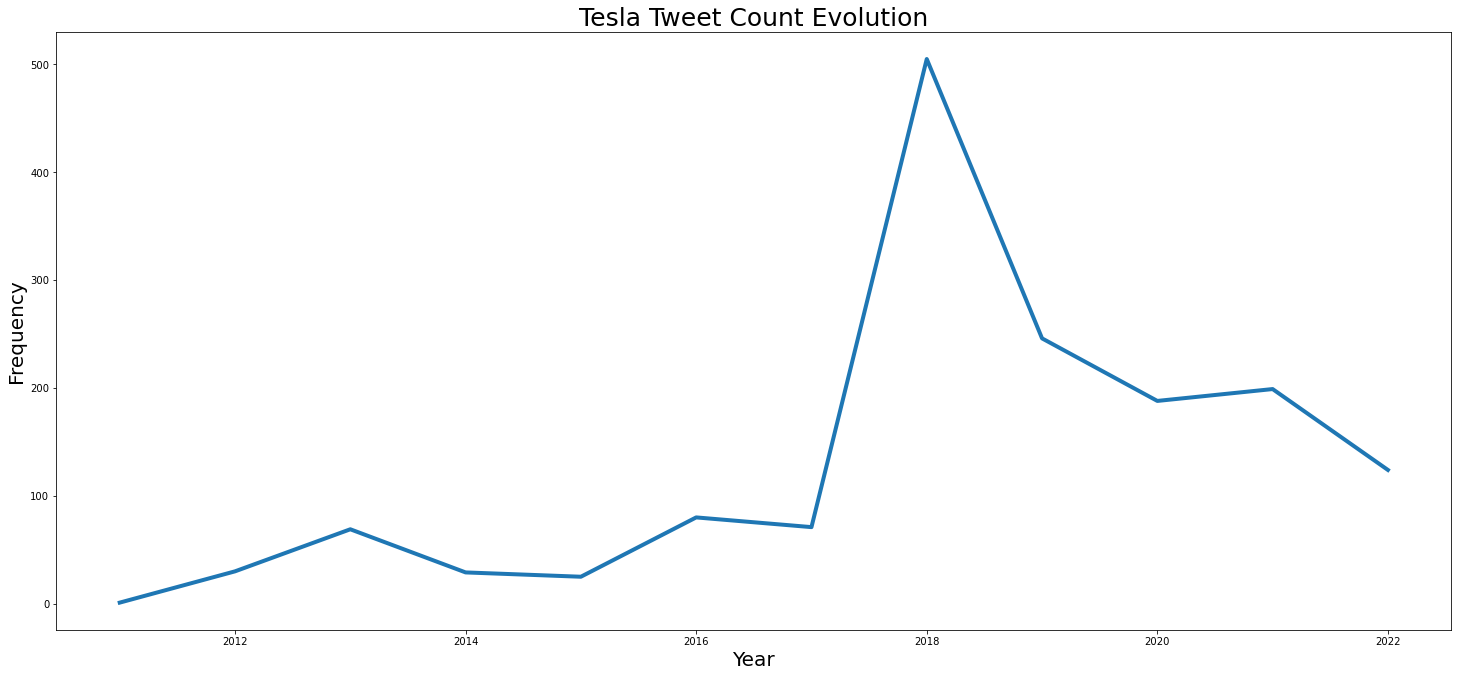

In [40]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_tesla_df, x= "Date", y= "Tweet", lw=4)
plt.title("Tesla Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [41]:
df_twitter = filterTweetData('twitter')

In [42]:
df_twitter

,Date,Tweet,id,nlikes,nreplies,nretweets
0,2015-05-22,What are the best riddles you've heard that are short enough for Twitter?,6.016691e+17,599.0,638.0,208.0
1,2016-04-04,"Signing off from impromptu Twitter AMA. Thanks for the suggestions. Btw, we really will have mor...",7.167804e+17,3252.0,241.0,367.0
2,2016-07-05,Exactly! I love Twitter.,7.503547e+17,328.0,13.0,41.0
3,2016-10-04,I use twitter for news orgs. My Insta has same women as men. What's up with the phoney PC police...,7.833472e+17,5254.0,312.0,1598.0
4,2016-10-06,"Yeah, and several others at various times. My twitter list is trimmed down to almost all news/co...",7.838422e+17,225.0,20.0,16.0
...,...,...,...,...,...,...
152,2022-05-31,"Maybe if they do the opposite, Twitter will be a much better experience – just an idea",1.531641e+18,3306.0,NaN,231.0
153,2022-06-09,Only Twitter,1.534938e+18,57460.0,NaN,2473.0
154,2022-06-18,To answer the question: Why Twitter?,1.538209e+18,47584.0,NaN,2810.0
155,2022-06-21,Twitter me &amp; real-life me are quite different haha!,1.539293e+18,147051.0,NaN,8697.0


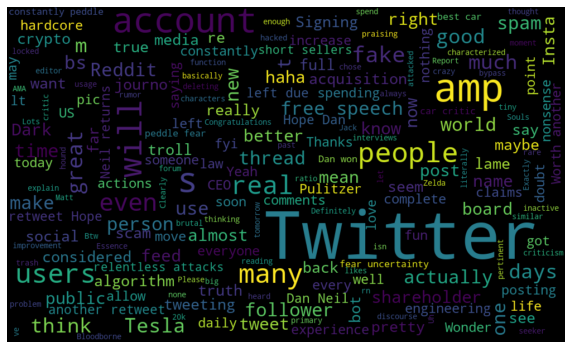

In [43]:
plt.figure(figsize=(10,8))
stopwords_wc = set(stopwords_wc)
allWords = ' '.join([twts for twts in df_twitter["Tweet"]])
wordCloud = WordCloud(stopwords=stopwords_wc, width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [44]:
# Get the number of tweets every year by Elon Musk
date_twitter_df = df_twitter.groupby(pd.DatetimeIndex(df_twitter["Date"]).year)["Tweet"].count()
date_twitter_df = date_twitter_df.to_frame()
date_twitter_df

,Tweet
Date,
2015,1
2016,4
2017,4
2018,43
2019,10
2020,15
2021,6
2022,74


Text(0, 0.5, 'Frequency')

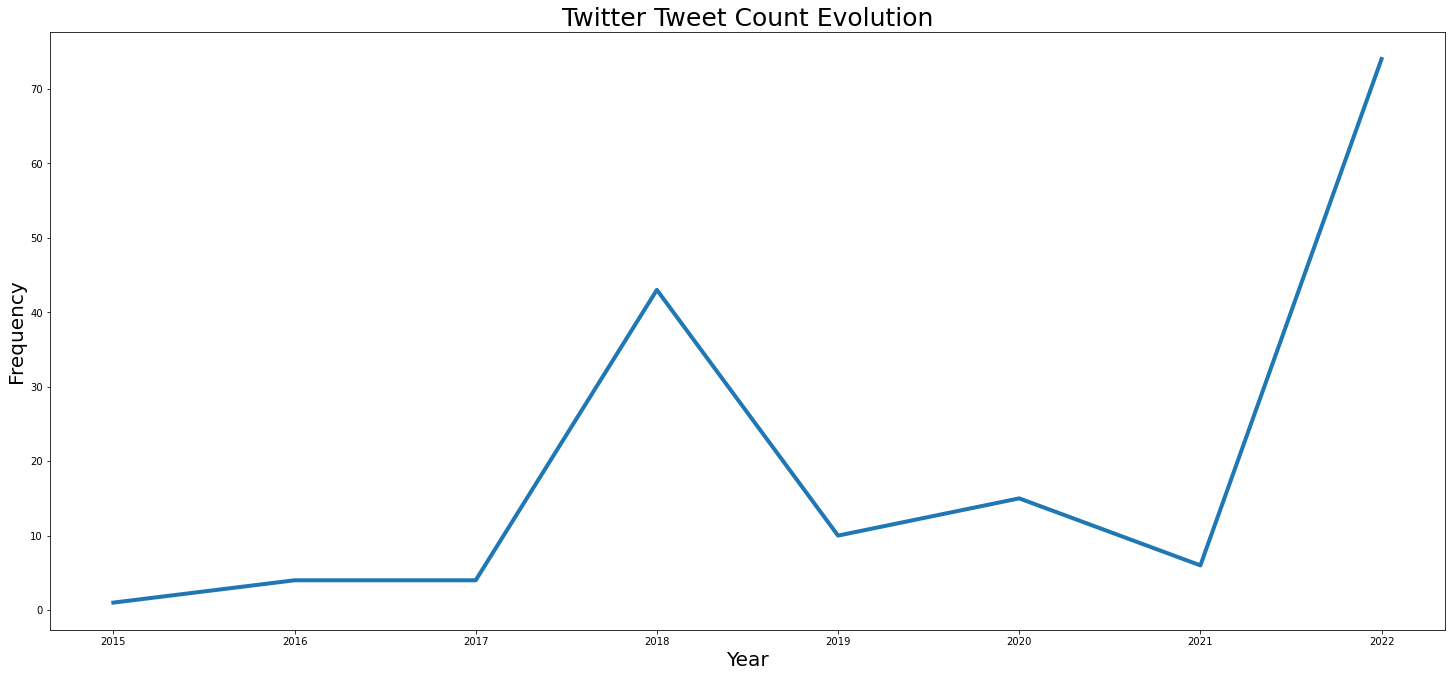

In [45]:
# Plot the number of tweets for Twitter by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_twitter_df, x= "Date", y= "Tweet", lw=4)
plt.title("Twitter Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

In [46]:
# # Get Popularity Information - to be looked by Shreha
# popularity = ["likes_count", "retweets_count", "replies_count"]
# popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
#                                                                     popularity[1] : 'sum',
#                                                                     popularity[2] : 'sum',
#                                                                     'tweet' : 'count'}).reset_index()
# popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
# popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
# popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Database population - Prepare Data for storing in Database and append records

In [47]:
df_doge['financeType']='doge'
df_tesla['financeType']='tesla'
df_twitter['financeType']='twitter'


In [48]:
df_tweet_tostore = pd.concat([df_doge, df_tesla, df_twitter],axis=0,ignore_index=False)

In [49]:
 df_tweet_tostore.rename(columns = {'id':'tweetID','Date':'date','Tweet':'fullText','nlikes':'likesCount','nreplies':'replyCount','nretweets':'retweetCount'}, inplace = True)

In [50]:
 df_tweet_tostore

,date,fullText,tweetID,likesCount,replyCount,retweetCount,financeType
0,2019-04-02,Dogecoin value may vary,1.113179e+18,20160.0,1080.0,1959.0,doge
1,2019-04-02,Dogecoin rulz,1.113173e+18,138893.0,1732.0,16539.0,doge
2,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,1.113009e+18,9063.0,558.0,2428.0,doge
3,2020-04-25,Dogecoin Mode,1.254040e+18,2192.0,124.0,207.0,doge
4,2020-07-18,"Excuse me, I only sell Doge!",1.284290e+18,15930.0,416.0,775.0,doge
...,...,...,...,...,...,...,...
152,2022-05-31,"Maybe if they do the opposite, Twitter will be a much better experience – just an idea",1.531641e+18,3306.0,NaN,231.0,twitter
153,2022-06-09,Only Twitter,1.534938e+18,57460.0,NaN,2473.0,twitter
154,2022-06-18,To answer the question: Why Twitter?,1.538209e+18,47584.0,NaN,2810.0,twitter
155,2022-06-21,Twitter me &amp; real-life me are quite different haha!,1.539293e+18,147051.0,NaN,8697.0,twitter


In [51]:
# need to fix this reindexing and dataloss issue
df_tweet_tostore= df_tweet_tostore[["tweetID","financeType","date","fullText","replyCount","likesCount","retweetCount"]]
df_tweet_tostore

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
0,1.113179e+18,doge,2019-04-02,Dogecoin value may vary,1080.0,20160.0,1959.0
1,1.113173e+18,doge,2019-04-02,Dogecoin rulz,1732.0,138893.0,16539.0
2,1.113009e+18,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,558.0,9063.0,2428.0
3,1.254040e+18,doge,2020-04-25,Dogecoin Mode,124.0,2192.0,207.0
4,1.284290e+18,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930.0,775.0
...,...,...,...,...,...,...,...
152,1.531641e+18,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be a much better experience – just an idea",NaN,3306.0,231.0
153,1.534938e+18,twitter,2022-06-09,Only Twitter,NaN,57460.0,2473.0
154,1.538209e+18,twitter,2022-06-18,To answer the question: Why Twitter?,NaN,47584.0,2810.0
155,1.539293e+18,twitter,2022-06-21,Twitter me &amp; real-life me are quite different haha!,NaN,147051.0,8697.0


In [52]:
df_tweet_tostore['tweetID'].value_counts()

1.022430e+18    6
1.498859e+18    4
1.499910e+18    3
1.000204e+18    2
9.767661e+17    2
               ..
1.102346e+18    1
1.102332e+18    1
1.101724e+18    1
1.101548e+18    1
1.544719e+18    1
Name: tweetID, Length: 1490, dtype: int64

In [53]:
duplicates = df_tweet_tostore['tweetID'].value_counts()[(df_tweet_tostore['tweetID'].value_counts()>1)].index.to_list()
duplicates

[1.0224303216968581e+18,
 1.4988586112416358e+18,
 1.4999098065047798e+18,
 1.0002041139534397e+18,
 9.767660946303058e+17,
 9.672385274181673e+17,
 9.498312123269939e+17,
 1.0470051941800223e+18,
 1.047963507625345e+18,
 1.048114562694697e+18,
 1.0490455617922949e+18,
 1.0493241113678152e+18,
 1.0497162036760371e+18,
 1.0505291425659412e+18,
 1.0508092586593444e+18,
 1.0507880439074488e+18,
 1.0515916230694298e+18,
 1.0518764538375619e+18,
 1.0517271345934459e+18,
 1.0519734436027351e+18,
 1.0521308835855073e+18,
 1.0526180415135867e+18,
 1.0523560935343022e+18,
 1.0530631078435144e+18,
 1.0530607667717612e+18,
 1.0530657458971484e+18,
 1.053128497747583e+18,
 1.0544960958191165e+18,
 1.0548016857914368e+18,
 1.054812318096216e+18,
 1.0555923216542433e+18,
 9.714663088553329e+17,
 9.805661011247227e+17,
 1.055874116803158e+18,
 9.805661033561948e+17,
 9.980821493569946e+17,
 9.980833680665436e+17,
 9.980843142008627e+17,
 9.980859010695987e+17,
 9.96131586469843e+17,
 9.96102919811350

In [55]:
for tweet_id in duplicates:
    
    duplicate_df = df_tweet_tostore[(df_tweet_tostore['tweetID'] == tweet_id)]
    max_reply_Count = duplicate_df["replyCount"].max()
    max_likes_Count = duplicate_df["likesCount"].max()
    max_retweet_Count = duplicate_df["retweetCount"].max()
    print(duplicate_df)
    
    for index in duplicate_df.index:
        df_tweet_tostore["replyCount"][index] = max_reply_Count
        df_tweet_tostore["likesCount"][index] = max_likes_Count
        df_tweet_tostore["retweetCount"][index] = max_retweet_Count
        

          tweetID financeType       date  \
553  1.022430e+18       tesla 2018-07-26   
554  1.022430e+18       tesla 2018-07-26   
555  1.022430e+18       tesla 2018-07-26   
27   1.022430e+18     twitter 2018-07-26   
28   1.022430e+18     twitter 2018-07-26   
29   1.022430e+18     twitter 2018-07-26   

                                                                                                fullText  \
553  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
554  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
555  Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
27   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
28   Worth another retweet. Hope Dan Neil returns to Twitter. He left due to relentless attacks from ...   
29   Worth another retweet. Hope Dan Neil r

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

          tweetID financeType       date  \
677  1.053128e+18       tesla 2018-10-19   
678  1.053128e+18       tesla 2018-10-19   

                                                                                               fullText  \
677  If you don’t like a Tesla for any reason or no reason, you can just give it back for a full refund   
678  If you don’t like a Tesla for any reason or no reason, you can just give it back for a full refund   

     replyCount  likesCount  retweetCount  
677       175.0      2152.0         194.0  
678       174.0      2134.0         192.0  
          tweetID financeType       date  \
679  1.054496e+18       tesla 2018-10-22   
680  1.054496e+18       tesla 2018-10-22   

                                                                                 fullText  \
679  Order Tesla without test drive &amp; you get 3 days to return for refund, else 1 day   
680  Order Tesla without test drive &amp; you get 3 days to return for refund, else 1 day   



C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date  \
341  9.923331e+17       tesla 2018-05-04   
344  9.923331e+17       tesla 2018-05-04   

                                                                                                fullText  \
341  The “dry” questions were not asked by investors, but rather by two sell-side analysts who were t...   
344  The “dry” questions were not asked by investors, but rather by two sell-side analysts who were t...   

     replyCount  likesCount  retweetCount  
341        91.0      5492.0         314.0  
344        87.0      5460.0         311.0  
          tweetID financeType       date  \
339  9.918137e+17       tesla 2018-05-02   
340  9.918137e+17       tesla 2018-05-02   

                                                                                                fullText  \
339  Your numbers are incorrect. Tesla Fremont is 3rd in world after a 🇳🇱🌸 place &amp; 🇦🇪 mall. Giga ...   
340  Your numbers are incorrect. Tesla Fremont is 3rd in worl

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date  \
777  1.075047e+18       tesla 2018-12-18   
778  1.075047e+18       tesla 2018-12-18   

                                                      fullText  replyCount  \
777  Honored to work with amazing teams at SpaceX &amp; Tesla!       653.0   
778  Honored to work with amazing teams at SpaceX &amp; Tesla!       646.0   

     likesCount  retweetCount  
777     33618.0        2015.0  
778     33321.0        1989.0  
          tweetID financeType       date  \
779  1.075228e+18       tesla 2018-12-19   
782  1.075228e+18       tesla 2018-12-19   

                                                                    fullText  \
779  This can be applied to any autonomous, electric vehicle, not just Tesla   
782  This can be applied to any autonomous, electric vehicle, not just Tesla   

     replyCount  likesCount  retweetCount  
779       257.0     14310.0         745.0  
782       255.0     14175.0         737.0  
          tweetID financeType 

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date                      fullText  \
713  1.062733e+18       tesla 2018-11-14  Would be fun to add to Tesla   
714  1.062733e+18       tesla 2018-11-14  Would be fun to add to Tesla   

     replyCount  likesCount  retweetCount  
713       419.0     16945.0         681.0  
714       424.0     17089.0         690.0  
          tweetID financeType       date  \
715  1.063121e+18       tesla 2018-11-15   
716  1.063121e+18       tesla 2018-11-15   

                                                                                                fullText  \
715  Tesla just acquired trucking capacity to ensure Model 3 can be delivered in US by Dec 31 if orde...   
716  Tesla just acquired trucking capacity to ensure Model 3 can be delivered in US by Dec 31 if orde...   

     replyCount  likesCount  retweetCount  
715      1310.0     18882.0        1663.0  
716      1316.0     19009.0        1677.0  
          tweetID financeType       date  \
717  1.0638

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date  \
556  1.024364e+18       tesla 2018-07-31   
558  1.024364e+18       tesla 2018-07-31   

                                                               fullText  \
556  Can’t wait to bring Tesla to Brazil. One of my favorite countries!   
558  Can’t wait to bring Tesla to Brazil. One of my favorite countries!   

     replyCount  likesCount  retweetCount  
556       113.0      1374.0         140.0  
558       113.0      1375.0         143.0  
          tweetID financeType       date  \
551  1.021461e+18       tesla 2018-07-23   
552  1.021461e+18       tesla 2018-07-23   

                                                    fullText  replyCount  \
551  Wow, that’s really awesome. Thank you! ♥️@TeslaOwnersUK        55.0   
552  Wow, that’s really awesome. Thank you! ♥️@TeslaOwnersUK        54.0   

     likesCount  retweetCount  
551      3236.0         130.0  
552      3207.0         126.0  
          tweetID financeType       date  \
548  1.

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date  \
629  1.043293e+18       tesla 2018-09-22   
630  1.043293e+18       tesla 2018-09-22   

                                                                                                fullText  \
629  Wow, thanks for offering to help! The coming week is incredibly intense. If any current Tesla ow...   
630  Wow, thanks for offering to help! The coming week is incredibly intense. If any current Tesla ow...   

     replyCount  likesCount  retweetCount  
629       337.0      2693.0         323.0  
630       336.0      2675.0         320.0  
          tweetID financeType       date  \
626  1.042832e+18       tesla 2018-09-20   
627  1.042832e+18       tesla 2018-09-20   

                                                                                           fullText  \
626  Tesla piece on the physics of car safety coming soon for those interested in technical details   
627  Tesla piece on the physics of car safety coming soon for those int

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v


          tweetID financeType       date  \
583  1.028351e+18       tesla 2018-08-11   
585  1.028351e+18       tesla 2018-08-11   

                                                                                                fullText  \
583  Great Q&amp;A last night. Thanks for helping make Tesla &amp; SpaceX more secure! Planning to op...   
585  Great Q&amp;A last night. Thanks for helping make Tesla &amp; SpaceX more secure! Planning to op...   

     replyCount  likesCount  retweetCount  
583       650.0     22665.0        3228.0  
585       645.0     22507.0        3196.0  
          tweetID financeType       date  \
582  1.028121e+18       tesla 2018-08-11   
587  1.028121e+18       tesla 2018-08-11   

                                    fullText  replyCount  likesCount  \
582  Short shorts coming soon to Tesla merch      2374.0     96185.0   
587  Short shorts coming soon to Tesla merch      2355.0     95209.0   

     retweetCount  
582       14188.0  
587       13951.0  

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["likesCount"][index] = max_likes_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date  \
397  9.989886e+17       tesla 2018-05-22   
402  9.989886e+17       tesla 2018-05-22   

                                                                                                fullText  \
397  We’re going to include some fun games as hidden Easter eggs in Tesla S, X &amp; 3. What do you t...   
402  We’re going to include some fun games as hidden Easter eggs in Tesla S, X &amp; 3. What do you t...   

     replyCount  likesCount  retweetCount  
397     12592.0     37968.0        2356.0  
402     12682.0     38275.0        2383.0  
          tweetID financeType       date  \
396  9.989847e+17       tesla 2018-05-22   
401  9.989847e+17       tesla 2018-05-22   

                                                                                                fullText  \
396  More “Reveal” bs. Tesla is overseen by Cal/OSHA, most stringent labor safety org in US, &amp; th...   
401  More “Reveal” bs. Tesla is overseen by Cal/OSHA, most st

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

          tweetID financeType       date  \
465  1.008115e+18       tesla 2018-06-16   
468  1.008115e+18       tesla 2018-06-16   

                                                                            fullText  \
465  I disagree with that goal &amp; gave away Tesla patents to help other companies   
468  I disagree with that goal &amp; gave away Tesla patents to help other companies   

     replyCount  likesCount  retweetCount  
465        22.0       530.0          36.0  
468        22.0       527.0          36.0  
          tweetID financeType       date  \
463  1.007663e+18       tesla 2018-06-15   
464  1.007663e+18       tesla 2018-06-15   

                                                                                                fullText  \
463  Already sold &gt;$100M TSLA for charity. Will do about that every few years. Major disbursements...   
464  Already sold &gt;$100M TSLA for charity. Will do about that every few years. Major disbursements...   

     replyCo

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

           tweetID financeType       date  \
55    1.452348e+18        doge 2021-10-24   
1387  1.452348e+18       tesla 2021-10-24   

                                                                                                 fullText  \
55    Lots of people I talked to on the production lines at Tesla or building rockets at SpaceX own Do...   
1387  Lots of people I talked to on the production lines at Tesla or building rockets at SpaceX own Do...   

      replyCount  likesCount  retweetCount  
55        4060.0     33219.0        7162.0  
1387      4060.0     33219.0        7162.0  
           tweetID financeType       date  \
1462  1.489350e+18       tesla 2022-02-04   
1463  1.489350e+18       tesla 2022-02-04   

                                                                    fullText  \
1462  Tesla is working hard to provide more Megapacks for grid stabilization   
1463  Tesla is working hard to provide more Megapacks for grid stabilization   

      replyCount  likesC

         tweetID financeType       date  \
19  1.004082e+18     twitter 2018-06-05   
20  1.004082e+18     twitter 2018-06-05   

                                                                                fullText  \
19  Congratulations Good move by Please use Matt’s Twitter pic. Essence of a good editor   
20  Congratulations Good move by Please use Matt’s Twitter pic. Essence of a good editor   

    replyCount  likesCount  retweetCount  
19        26.0      1685.0          53.0  
20        26.0      1673.0          53.0  
         tweetID financeType       date  \
42  1.055994e+18     twitter 2018-10-27   
47  1.055994e+18     twitter 2018-10-27   

                                                          fullText  \
42  Reddit’s twitter account is lame, because it’s not real Reddit   
47  Reddit’s twitter account is lame, because it’s not real Reddit   

    replyCount  likesCount  retweetCount  
42        41.0      2554.0          53.0  
47        41.0      2513.0          5

C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["retweetCount"][index] = max_retweet_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet_tostore["replyCount"][index] = max_reply_Count
C:\Users\tamie\AppData\Local\Temp/ipykernel_33332/2159316170.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [56]:
df_tweet_tostore[df_tweet_tostore.duplicated()]

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
67,1.485953e+18,doge,2022-01-25,I will eat a happy meal on tv if accepts Dogecoin,31009.0,422498.0,59390.0
245,8.319726e+17,tesla,2017-02-15,"In appreciation, Tesla is providing all repair costs free of charge and expedited.",809.0,47538.0,13820.0
306,9.498312e+17,tesla,2018-01-07,"Gonna put an old school drive-in, roller skates &amp; rock restaurant at one of the new Tesla Su...",4295.0,172818.0,15550.0
308,9.672385e+17,tesla,2018-02-24,Am feeling optimistic about beating the Semi specs announced at the unveiling for the same price...,355.0,15288.0,942.0
310,9.714663e+17,tesla,2018-03-07,"First production cargo trip of the Tesla Semi heavy duty truck, carrying battery packs from the…",869.0,31485.0,4081.0
...,...,...,...,...,...,...,...
51,1.059969e+18,twitter,2018-11-07,"I think Twitter is deleting fake, scam or maybe even inactive accounts. My follower count decrea...",4429.0,113840.0,4658.0
57,1.119093e+18,twitter,2019-04-19,My Twitter is pretty much complete nonsense at this point,6066.0,368095.0,60904.0
84,1.484457e+18,twitter,2022-01-21,Twitter is spending engineering resources on this bs while crypto scammers are throwing a spambo...,7983.0,149078.0,10037.0
87,1.498940e+18,twitter,2022-03-02,🤣🤣 That was me tweeting from when someone else had snatched my name. I was actually one of the e...,1182.0,25779.0,983.0


In [57]:
df_tweet_tostore = df_tweet_tostore.drop_duplicates()
df_tweet_tostore

,tweetID,financeType,date,fullText,replyCount,likesCount,retweetCount
0,1.113179e+18,doge,2019-04-02,Dogecoin value may vary,1080.0,20160.0,1959.0
1,1.113173e+18,doge,2019-04-02,Dogecoin rulz,1732.0,138893.0,16539.0
2,1.113009e+18,doge,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.,558.0,9063.0,2428.0
3,1.254040e+18,doge,2020-04-25,Dogecoin Mode,124.0,2192.0,207.0
4,1.284290e+18,doge,2020-07-18,"Excuse me, I only sell Doge!",416.0,15930.0,775.0
...,...,...,...,...,...,...,...
152,1.531641e+18,twitter,2022-05-31,"Maybe if they do the opposite, Twitter will be a much better experience – just an idea",NaN,3306.0,231.0
153,1.534938e+18,twitter,2022-06-09,Only Twitter,NaN,57460.0,2473.0
154,1.538209e+18,twitter,2022-06-18,To answer the question: Why Twitter?,NaN,47584.0,2810.0
155,1.539293e+18,twitter,2022-06-21,Twitter me &amp; real-life me are quite different haha!,NaN,147051.0,8697.0


In [58]:
df_tweet_tostore['tweetID'].value_counts()

1.498859e+18    2
1.395438e+18    2
1.527418e+18    2
1.530209e+18    2
1.392030e+18    2
               ..
1.017334e+18    1
1.017054e+18    1
1.014942e+18    1
1.014965e+18    1
1.544719e+18    1
Name: tweetID, Length: 1490, dtype: int64

In [59]:
duplicates2 = df_tweet_tostore['tweetID'].value_counts()[(df_tweet_tostore['tweetID'].value_counts()>1)].index.to_list()
duplicates2

[1.4988586112416358e+18,
 1.3954375223064904e+18,
 1.5274180230695035e+18,
 1.530209049261658e+18,
 1.3920301082741596e+18,
 1.0224303216968581e+18,
 1.48187342139068e+18,
 1.470703708677841e+18,
 1.4548081042567373e+18,
 1.4523481267533496e+18]

In [60]:
for tweet_id in duplicates2:
    
    duplicate_df = df_tweet_tostore[(df_tweet_tostore['tweetID'] == tweet_id)]
    print(duplicate_df)
    

           tweetID financeType       date  \
1477  1.498859e+18       tesla 2022-03-02   
86    1.498859e+18     twitter 2022-03-02   

                                                                                                 fullText  \
1477  Tesla has created over 50,000 US jobs building electric vehicles &amp; is investing more than do...   
86    Tesla has created over 50,000 US jobs building electric vehicles &amp; is investing more than do...   

      replyCount  likesCount  retweetCount  
1477      8787.0    270836.0       37338.0  
86        8787.0    270836.0       37338.0  
           tweetID financeType       date  \
40    1.395438e+18        doge 2021-05-20   
1298  1.395438e+18       tesla 2021-05-20   

                                                                       fullText  \
40    A longtime Tesla supporter gave me the Doge dollar sticker at Giga Berlin   
1298  A longtime Tesla supporter gave me the Doge dollar sticker at Giga Berlin   

      replyCoun

In [ ]:
# Database related all the code is moved to this file
%run -i "SqlConn.py"
#importing local py file
import SqlConn 

In [ ]:
# Save Tweet data

try:
    SqlConn.insertTweets(df_tweet_tostore)
    print("Data Transfer Done")
except BaseException as err:
    print(err)